In [1]:
# univariate cnn lstm example
from numpy import array

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

import numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
from math import sqrt


# split a univariate sequence into samples

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def train_test (n_steps_in, n_steps_out, propTrainTest, dataset):
    
    n_steps_in, n_steps_out = n_steps_in, n_steps_out
    # split train test
    X, y = split_sequence(dataset, n_steps_in, n_steps_out)
    
    train_size = int(len(X) * propTrainTest)
    test_size = len(dataset) - train_size
    train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
    train_Y, test_Y = y[0:train_size,:], y[train_size:len(y),:]
    
    return (train_X, test_X, train_Y, test_Y)

def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calcul global de RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
# fixem random seed
numpy.random.seed(7)

dadesSau = read_csv('dadesSau.csv', sep=';',header=0, index_col=0)
dataframe = pd.DataFrame(dadesSau.loc[dadesSau.index >= '2000-01-01']['Volum'])
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalitzem

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset = [item for sublist in dataset for item in sublist]

n_steps_in = 20
n_steps_out = 15
propTrainTest = 0.8
train_X, test_X, train_Y, test_Y = train_test(n_steps_in, n_steps_out, propTrainTest, dataset)


c:\users\manel\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
from scipy.stats import uniform
from scipy.stats import randint
arbres=[]
profunditat=[]
max_features=[]
min_samples_split = []
min_samples_leaf = []
for i in range(500):
    arbres.append((randint.rvs(5, 500)))
    profunditat.append((randint.rvs(1, 121)))
    max_features.append((randint.rvs(1, 20)))
    min_samples_split.append((randint.rvs(2, 50)))
    min_samples_leaf.append((randint.rvs(1, 45)))

In [7]:
#Simulació RandomizedSearchCV per SVM
resultat=[]

for arbre, profund, max_f, mss, msl in zip(arbres, profunditat, max_features, min_samples_split, min_samples_leaf):
    regr_rf = RandomForestRegressor(n_estimators=arbre, max_depth=profund, max_features=max_f, 
                                    min_samples_split = mss, min_samples_leaf=msl, random_state=2)
    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT,arbre, profund, max_f, mss, msl)
    resultat.append((arbre, profund, max_f, mss, msl, RMSE_days,RMSE_TOT))

6.833503652710464 180 69 4 21 24
6.9248375174605385 108 93 15 25 9
6.907655546633306 350 111 11 28 9
7.434467502884268 172 103 5 9 1
7.087943840709423 80 56 7 21 6
6.4644855040212095 317 25 17 2 35
6.7151339011174995 317 74 15 40 5
7.137606287323145 499 10 4 5 9
7.105074357335916 344 49 2 2 17
6.8399880389298 379 32 13 30 8
6.839568150350782 284 11 10 37 1
7.428159785915516 322 8 1 23 37
6.7413233817102265 424 98 4 29 34
6.718765861458897 24 28 5 21 34
6.674654391979834 128 31 6 11 30
6.957143650951335 470 32 3 21 19
6.998607149348213 26 120 4 13 17
6.8691407793603165 17 94 12 43 10
6.691950294477426 337 68 15 16 21
6.682710910011162 314 16 4 6 44
6.67347119022868 461 91 12 49 24
6.616699072197881 466 51 8 5 30
6.804097545693311 401 77 16 31 9
6.702311458783796 59 39 7 23 28
6.714520163576655 140 82 11 49 6
6.613899859480504 105 53 10 43 30
7.267191160122262 287 65 3 14 7
6.588572662382482 493 35 11 48 30
6.737753771909535 491 107 18 7 16
6.466814921006499 54 55 13 43 41
6.729563588881

6.650996517852208 478 7 16 37 11
6.53207079104463 59 110 18 40 30
6.89490768857104 384 97 7 18 14
9.221337786486913 275 2 18 36 34
7.395101894747904 64 116 1 21 43
6.642134800353722 161 6 9 3 16
6.607707776883984 276 54 18 11 26
7.103410567637041 294 3 7 2 29
6.659521896560247 325 9 7 30 29
7.42237136234016 229 82 2 9 5
6.522448033455679 74 61 16 39 31
7.052141888430321 310 94 2 7 25
16.201448223574438 66 1 8 18 17
7.114753124288887 61 77 4 22 5
7.197992622323484 11 38 15 8 8
7.0743248665428915 11 48 6 35 12
6.418338033306233 285 49 16 47 44
6.998774073985989 468 80 2 9 34
6.652534548873149 162 27 16 48 15
6.700473284353805 136 28 17 42 13
6.847409419593474 85 54 8 39 8
7.0074533143017 245 78 12 20 10
6.989435991850047 305 10 3 35 5
7.075196171940072 263 95 6 4 9
6.429535457511894 199 25 18 48 39
6.779999378426649 185 75 8 25 20
6.993635280613409 131 3 10 39 44
6.5068490046067495 218 54 16 10 32
6.906177848587923 386 28 3 23 25
6.665499106641982 72 55 10 37 26
6.743087771204306 419 9 7

6.716704463025735 132 22 14 45 4
7.411454178459214 491 32 1 15 23


In [8]:
varlist = []
for i in range(len(arbres)):
    varlist.append(resultat[i])
    
resultFinal = pd.DataFrame(varlist)
resultFinal.columns=['n_estimators','max_depth',  'max_feautres','min_samples_split','min_samples_leaf','RMSE_dies', 'RMSE_total' ]
resultFinal = resultFinal.sort_values(by='RMSE_total', ascending=True)
resultFinal = resultFinal.reset_index(drop=True)

resultFinal[0:15]

,n_estimators,max_depth,max_feautres,min_samples_split,min_samples_leaf,RMSE_dies,RMSE_total
0,362,83,19,21,44,"[1.4241062599151908, 2.27930268522198, 3.06196...",6.401004
1,277,47,19,17,43,"[1.417926895072028, 2.272865735257125, 3.05515...",6.403245
2,244,111,17,41,44,"[1.446912356124506, 2.30378557076088, 3.085962...",6.412457
3,368,94,18,48,43,"[1.4340192929046414, 2.2907094038385334, 3.074...",6.413994
4,472,30,18,42,42,"[1.434610187732911, 2.291611959092043, 3.07539...",6.416852
5,285,49,16,47,44,"[1.4642920427875712, 2.3228290453518334, 3.105...",6.418338
6,479,74,18,30,41,"[1.4270840679577665, 2.2852304790657016, 3.069...",6.419193
7,463,19,18,28,40,"[1.4233412050795915, 2.283286682068438, 3.0683...",6.421258
8,292,97,16,46,43,"[1.4595590173421245, 2.317794802553116, 3.1005...",6.421646
9,134,21,17,17,43,"[1.4437872516498216, 2.301042455689641, 3.0833...",6.423586


In [9]:
# Create a random dataset
regr_rf = RandomForestRegressor(n_estimators=362, max_depth=83, max_features=19, 
                                    min_samples_split = 21, min_samples_leaf=44, random_state=2)
    
regr_rf.fit(train_X, train_Y)
testPredict = regr_rf.predict(test_X)
# invertim prediccions per tenir-les en l'escala original
testPredict = scaler.inverse_transform(testPredict)
test_YR = scaler.inverse_transform(test_Y)

RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
 

In [10]:
RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
print(RMSE_TOT)

6.401003942346285


In [11]:
from tabulate import tabulate
headers=[]
for i in range(len(RMSE_days)):
    headers.append('dia '+str(i+1))

headers.append('Total')
v = RMSE_days
ultim = v.append(RMSE_TOT)
table1 = tabulate([RMSE_days[0:5]], headers[0:5], tablefmt="fancy_grid")
table2 = tabulate([RMSE_days[5:10]], headers[5:10], tablefmt="fancy_grid")
table3 = tabulate([RMSE_days[10:16]], headers[10:16], tablefmt="fancy_grid")
#output
print(table1)
print(table2)
print(table3)

╒═════════╤═════════╤═════════╤═════════╤═════════╕
│   dia 1 │   dia 2 │   dia 3 │   dia 4 │   dia 5 │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 1.42411 │  2.2793 │ 3.06197 │ 3.78118 │ 4.45016 │
╘═════════╧═════════╧═════════╧═════════╧═════════╛
╒═════════╤═════════╤═════════╤═════════╤══════════╕
│   dia 6 │   dia 7 │   dia 8 │   dia 9 │   dia 10 │
╞═════════╪═════════╪═════════╪═════════╪══════════╡
│ 5.07621 │ 5.67501 │ 6.25084 │ 6.79183 │  7.28849 │
╘═════════╧═════════╧═════════╧═════════╧══════════╛
╒══════════╤══════════╤══════════╤══════════╤══════════╤═════════╕
│   dia 11 │   dia 12 │   dia 13 │   dia 14 │   dia 15 │   Total │
╞══════════╪══════════╪══════════╪══════════╪══════════╪═════════╡
│  7.75038 │  8.17967 │  8.57644 │  8.95422 │  9.32128 │   6.401 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧═════════╛


In [13]:
dies = list()
    # calculem RMSE per cada dia
    
for i in range(test_YR.shape[1]):
    # calculem MSE
    dies.append((test_YR[:, i], testPredict[:, i]))

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]
title1 = '1 dia - Sau - RMSE: '+str(round(RMSE_days[0],3))
title5 = '5 dies - Sau - RMSE: '+str(round(RMSE_days[4],3))
title10 = '10 dies - Sau - RMSE: '+str(round(RMSE_days[9],3))
title15 = '15 dies - Sau - RMSE: '+str(round(RMSE_days[14],3))


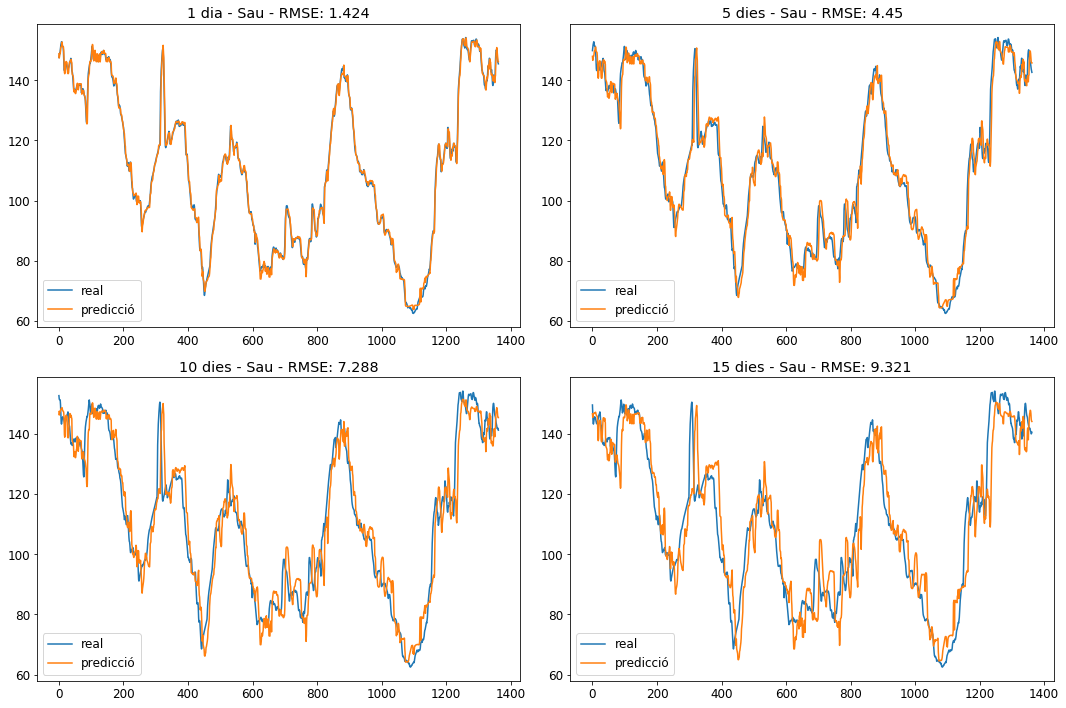

In [14]:
plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(dies[0][0], label='real')
axes[0, 0].plot(dies[0][1], label='predicció')
axes[0, 0].legend(loc=3)

axes[0, 1].set_title(title5)
axes[0, 1].plot(dies[4][0], label='real')
axes[0, 1].plot(dies[4][1], label='predicció')
axes[0, 1].legend(loc=3)

axes[1, 0].set_title(title10)
axes[1, 0].plot(dies[9][0], label='real')
axes[1, 0].plot(dies[9][1], label='predicció')
axes[1, 0].legend(loc=3)

axes[1, 1].set_title(title15)
axes[1, 1].plot(dies[14][0], label='real')
axes[1, 1].plot(dies[14][1], label='predicció')
axes[1, 1].legend(loc=3)


fig.tight_layout()
plt.show()

In [5]:
resultat = []
n_steps_out = 15
propTrainTest = 0.8
n_steps_in = np.arange(5,101,1)

for entrades in n_steps_in:
    train_X, test_X, train_Y, test_Y = train_test(entrades, n_steps_out, propTrainTest, dataset)
    if entrades <19:
        max_feat = entrades
    else:
        max_feat = 19
        
    regr_rf = RandomForestRegressor(n_estimators=362, max_depth=83, max_features=max_feat, 
                                        min_samples_split = 21, min_samples_leaf=44, random_state=2)

    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT, entrades)
    resultat.append((entrades, RMSE_TOT))
    

6.283232746639165 5
6.2953688102342085 6
6.313053608425336 7
6.335199508072055 8
6.362426379451128 9
6.379735791847584 10
6.375590715121184 11
6.37407974829985 12
6.3722192656059695 13
6.365929596019391 14
6.367134160677076 15
6.367670478394464 16
6.376334167692079 17
6.378274954908482 18
6.382641383269764 19
6.401003942346285 20
6.407270681453234 21
6.394370737155388 22
6.418992172035023 23
6.429207976920496 24
6.4366299868526955 25
6.441027347573695 26
6.423440338910197 27
6.414894295526973 28
6.435902452881645 29
6.443628313193714 30
6.443137392465036 31
6.443535963162081 32
6.439643020789535 33
6.42773092178273 34
6.454586951986863 35
6.434568919353591 36
6.448331028024138 37
6.419556182960416 38
6.419785094586588 39
6.4315969951690874 40
6.4466211811105225 41
6.448007901248537 42
6.460412139884549 43
6.480689737225843 44
6.466875735840225 45
6.487902753742457 46
6.497032299154606 47
6.511486523922424 48
6.5181106288654735 49
6.530136006442366 50
6.533318739963528 51
6.543641124738

In [6]:
resultat = []
n_steps_out = 15
propTrainTest = 0.8
n_steps_in = np.arange(1,12,1)

for entrades in n_steps_in:
    train_X, test_X, train_Y, test_Y = train_test(entrades, n_steps_out, propTrainTest, dataset)
    if entrades <19:
        max_feat = entrades
    else:
        max_feat = 19
        
    regr_rf = RandomForestRegressor(n_estimators=362, max_depth=83, max_features=max_feat, 
                                        min_samples_split = 21, min_samples_leaf=44, random_state=2)

    regr_rf.fit(train_X, train_Y)
    testPredict = regr_rf.predict(test_X)
    # invertim prediccions per tenir-les en l'escala original
    testPredict = scaler.inverse_transform(testPredict)
    test_YR = scaler.inverse_transform(test_Y)

    RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
    print(RMSE_TOT, entrades)
    resultat.append((entrades, RMSE_TOT))

6.457759735365362 1
6.351619262033557 2
6.288974818026128 3
6.292688049443006 4
6.283232746639165 5
6.2953688102342085 6
6.313053608425336 7
6.335199508072055 8
6.362426379451128 9
6.379735791847584 10
6.375590715121184 11


In [2]:
n_steps_in = 5
n_steps_out = 15
propTrainTest = 0.8
train_X, test_X, train_Y, test_Y = train_test(n_steps_in, n_steps_out, propTrainTest, dataset)


regr_rf = RandomForestRegressor(n_estimators=362, max_depth=83, max_features=5, 
                                    min_samples_split = 21, min_samples_leaf=44, random_state=2)
    
regr_rf.fit(train_X, train_Y)
testPredict = regr_rf.predict(test_X)
# invertim prediccions per tenir-les en l'escala original
testPredict = scaler.inverse_transform(testPredict)
test_YR = scaler.inverse_transform(test_Y)

RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)



╒═════════╤═════════╤═════════╤═════════╤═════════╕
│   dia 1 │   dia 2 │   dia 3 │   dia 4 │   dia 5 │
╞═════════╪═════════╪═════════╪═════════╪═════════╡
│ 1.35637 │  2.2223 │ 3.00863 │ 3.72542 │ 4.38473 │
╘═════════╧═════════╧═════════╧═════════╧═════════╛
╒═════════╤═════════╤═════════╤═════════╤══════════╕
│   dia 6 │   dia 7 │   dia 8 │   dia 9 │   dia 10 │
╞═════════╪═════════╪═════════╪═════════╪══════════╡
│   4.996 │ 5.58071 │ 6.14615 │ 6.67978 │  7.16851 │
╘═════════╧═════════╧═════════╧═════════╧══════════╛
╒══════════╤══════════╤══════════╤══════════╤══════════╤═════════╕
│   dia 11 │   dia 12 │   dia 13 │   dia 14 │   dia 15 │   Total │
╞══════════╪══════════╪══════════╪══════════╪══════════╪═════════╡
│  7.61628 │   8.0259 │  8.40482 │  8.76805 │  9.13355 │ 6.28323 │
╘══════════╧══════════╧══════════╧══════════╧══════════╧═════════╛


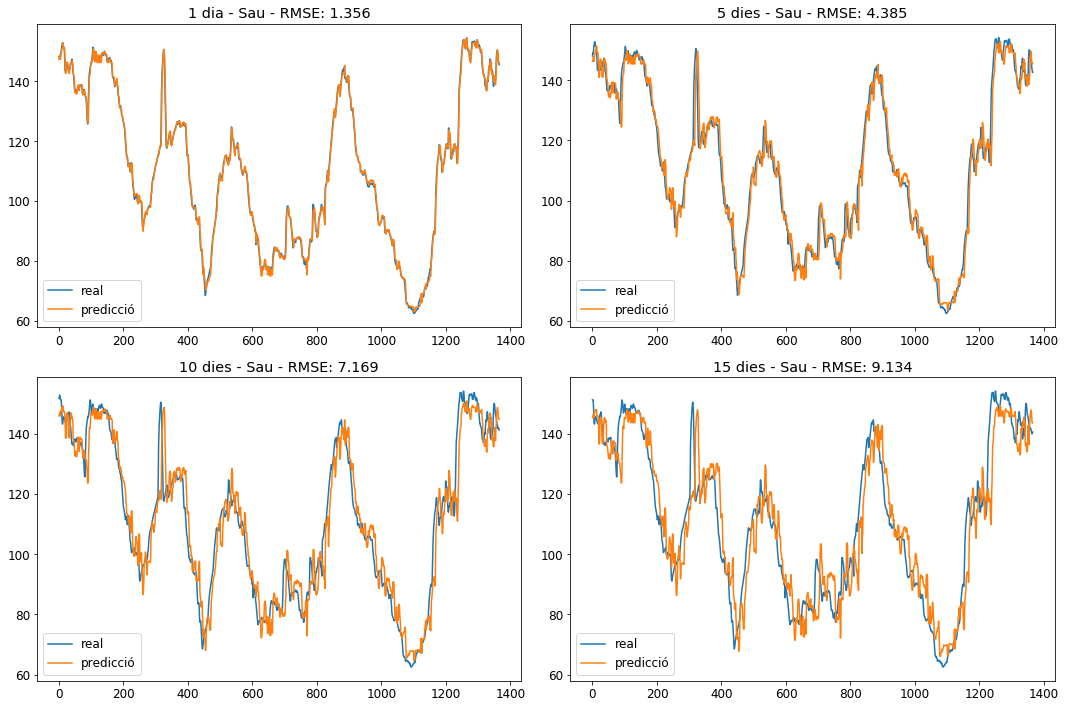

In [3]:
from tabulate import tabulate
headers=[]
for i in range(len(RMSE_days)):
    headers.append('dia '+str(i+1))

headers.append('Total')
v = RMSE_days
ultim = v.append(RMSE_TOT)
table1 = tabulate([RMSE_days[0:5]], headers[0:5], tablefmt="fancy_grid")
table2 = tabulate([RMSE_days[5:10]], headers[5:10], tablefmt="fancy_grid")
table3 = tabulate([RMSE_days[10:16]], headers[10:16], tablefmt="fancy_grid")
#output
print(table1)
print(table2)
print(table3)

dies = list()
    # calculem RMSE per cada dia
    
for i in range(test_YR.shape[1]):
    # calculem MSE
    dies.append((test_YR[:, i], testPredict[:, i]))

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]
title1 = '1 dia - Sau - RMSE: '+str(round(RMSE_days[0],3))
title5 = '5 dies - Sau - RMSE: '+str(round(RMSE_days[4],3))
title10 = '10 dies - Sau - RMSE: '+str(round(RMSE_days[9],3))
title15 = '15 dies - Sau - RMSE: '+str(round(RMSE_days[14],3))

plt.rcParams.update({'font.size': 12})

plt.subplots_adjust(hspace=0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot time signal:
axes[0, 0].set_title(title1)
axes[0, 0].plot(dies[0][0], label='real')
axes[0, 0].plot(dies[0][1], label='predicció')
axes[0, 0].legend(loc=3)

axes[0, 1].set_title(title5)
axes[0, 1].plot(dies[4][0], label='real')
axes[0, 1].plot(dies[4][1], label='predicció')
axes[0, 1].legend(loc=3)

axes[1, 0].set_title(title10)
axes[1, 0].plot(dies[9][0], label='real')
axes[1, 0].plot(dies[9][1], label='predicció')
axes[1, 0].legend(loc=3)

axes[1, 1].set_title(title15)
axes[1, 1].plot(dies[14][0], label='real')
axes[1, 1].plot(dies[14][1], label='predicció')
axes[1, 1].legend(loc=3)


fig.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
def evaluate_forecasts_rquad(actual, predicted):
    scores = list()
    # calculem RMSE per cada dia
    for i in range(actual.shape[1]):
        # calculem MSE
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        r_quad = r2_score(actual[:, i], predicted[:, i])
        mae = mean_absolute_error(actual[:, i], predicted[:, i])
        # calculem RMSE
        rmse = sqrt(mse)
        # store
        scores.append((rmse,r_quad,mae,mse))
    # calcul global de RMSE
    s = 0
    r = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [5]:
RMSE_TOT, RMSE_days = evaluate_forecasts_rquad(test_YR,testPredict)
global_y = test_YR.reshape((test_YR.shape[0]*test_YR.shape[1], 1))
global_pred = testPredict.reshape((testPredict.shape[0]*testPredict.shape[1], 1))
r_quad = r2_score(global_y, global_pred)
rmse = sqrt(mean_squared_error(global_y, global_pred))
mse = mean_squared_error(global_y, global_pred)
mae = mean_absolute_error(global_y, global_pred)

res_globals=[rmse, r_quad, mae, mse]

resultsDF =  pd.DataFrame(RMSE_days)
resultsDF = resultsDF.T
resultsDF['Global'] = res_globals
resultsDF.columns=['dia 1','dia 2','dia 3','dia 4','dia 5','dia 6','dia 7','dia 8','dia 9','dia 10','dia 11','dia 12','dia 13','dia 14','dia 15', 'global']
resultsDF.rename(index={0:'RMSE',1:'R2',2:'MAE', 3:'MSE'}, inplace=True)
resultsDF = resultsDF.round(4)
display(resultsDF)

,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6,dia 7,dia 8,dia 9,dia 10,dia 11,dia 12,dia 13,dia 14,dia 15,global
RMSE,1.3564,2.2223,3.0086,3.7254,4.3847,4.9960,5.5807,6.1461,6.6798,7.1685,7.6163,8.0259,8.4048,8.7680,9.1335,6.2832
R2,0.9972,0.9925,0.9862,0.9788,0.9706,0.9619,0.9524,0.9422,0.9317,0.9213,0.9111,0.9012,0.8915,0.8818,0.8716,0.9396
MAE,0.9495,1.5281,2.0698,2.5643,3.0334,3.4765,3.9150,4.3522,4.7838,5.1829,5.5517,5.9014,6.2445,6.5881,6.9229,4.2043
MSE,1.8397,4.9386,9.0519,13.8787,19.2258,24.9600,31.1443,37.7751,44.6194,51.3876,58.0077,64.4151,70.6409,76.8786,83.4217,39.4790


In [6]:
RMSE_TOT, RMSE_days = evaluate_forecasts(test_YR,testPredict)
v = RMSE_days
ultim = v.append(RMSE_TOT)

dades_diesDF=pd.DataFrame(v)
dades_diesDF=dades_diesDF.round(3)
dades_diesDF=dades_diesDF.T
dades_diesDF.columns=['dia 1','dia 2','dia 3','dia 4','dia 5','dia 6','dia 7','dia 8','dia 9','dia 10','dia 11','dia 12','dia 13','dia 14','dia 15', 'global']
dades_diesDF.rename(index={0:'RMSE'}, inplace=True)

display(dades_diesDF)

,dia 1,dia 2,dia 3,dia 4,dia 5,dia 6,dia 7,dia 8,dia 9,dia 10,dia 11,dia 12,dia 13,dia 14,dia 15,global
RMSE,1.356,2.222,3.009,3.725,4.385,4.996,5.581,6.146,6.68,7.169,7.616,8.026,8.405,8.768,9.134,6.283


In [7]:
resultsDF.to_csv('rf-uni-sau.csv', sep=',', encoding='utf-8')